In [3]:
from google.colab import files
uploaded = files.upload()

Saving train-00000-of-00001-c08a401c53fe5312.parquet to train-00000-of-00001-c08a401c53fe5312 (1).parquet


In [4]:
import pandas as pd
import io

train_df = pd.read_parquet('train-00000-of-00001-c08a401c53fe5312 (1).parquet')

In [5]:
uploaded = files.upload()

Saving test-00000-of-00001-44110b9df98c5585.parquet to test-00000-of-00001-44110b9df98c5585 (1).parquet


In [6]:
test_df = pd.read_parquet('test-00000-of-00001-44110b9df98c5585 (1).parquet')

In [8]:
print(train_df.columns)
print(len(train_df['image']))  # Dovrebbe restituire 5120 (o il numero di immagini nel dataset)
print(len(train_df['label']))  # Dovrebbe essere uguale al numero di immagini


Index(['image', 'label'], dtype='object')
5120
5120


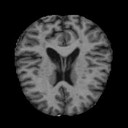

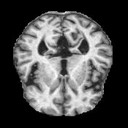

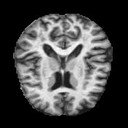

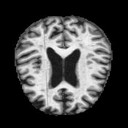

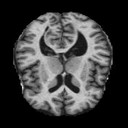

In [9]:
from PIL import Image
import io

for i in range(5):  # Visualizza le prime 5 immagini
  image_data = train_df['image'][i] # Ottiene il dizionario per l'immagine
  image_bytes = image_data['bytes'] # Estrae i byte dell'immagine usando la chiave 'bytes'
  image = Image.open(io.BytesIO(image_bytes))
  display(image)


In [10]:
X_train = train_df['image'].apply(lambda x: x['bytes'])
y_train = train_df['label']

X_test = test_df['image'].apply(lambda x: x['bytes'])
y_test = test_df['label']

In [11]:
import numpy as np
import io

def preprocess_image(image_bytes):
     image = Image.open(io.BytesIO(image_bytes))
     image = image.resize((128, 128))
     image = np.array(image) / 255.0
     return image

X_train = np.array([preprocess_image(img) for img in X_train])
X_test = np.array([preprocess_image(img) for img in X_test])

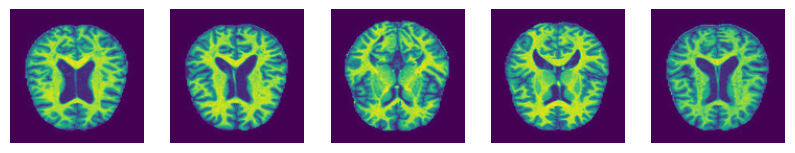

In [12]:
import matplotlib.pyplot as plt
import random


random_indices = random.sample(range(len(X_train)), 5)
random_images = X_train[random_indices]


plt.figure(figsize=(10, 5))
for i, image in enumerate(random_images):
  plt.subplot(1, 5, i + 1)
  plt.imshow(image)
  plt.axis('off')
plt.show()



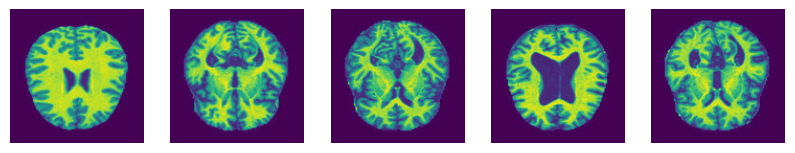

In [13]:
import matplotlib.pyplot as plt
import random


random_indices = random.sample(range(len(X_test)), 5)
random_images = X_train[random_indices]


plt.figure(figsize=(10, 5))
for i, image in enumerate(random_images):
  plt.subplot(1, 5, i + 1)
  plt.imshow(image)
  plt.axis('off')
plt.show()



In [14]:
print("Forma di X_train:", X_train.shape)
print("Tipo di dati di X_train:", X_train.dtype)

print("Forma di X_test:", X_test.shape)
print("Tipo di dati di X_test:", X_test.dtype)

print(len(train_df['image']))  # Dovrebbe restituire 5120 (o il numero di immagini nel dataset)
print(len(train_df['label']))  # Dovrebbe essere uguale al numero di immagini


Forma di X_train: (5120, 128, 128)
Tipo di dati di X_train: float64
Forma di X_test: (1280, 128, 128)
Tipo di dati di X_test: float64
5120
5120


In [16]:
X_train = X_train.reshape(-1, 128, 128, 1)  # Forma (5120, 128, 128, 1)
X_train = np.repeat(X_train, 3, axis=-1)  # Forma (5120, 128, 128, 3)
X_test = X_test.reshape(-1, 128, 128, 1)
X_test = np.repeat(X_test, 3, axis=-1)

In [17]:
print(len(train_df['image']))  # Dovrebbe restituire 5120 (o il numero di immagini nel dataset)
print(len(train_df['label']))  # Dovrebbe essere uguale al numero di immagini


5120
5120


In [19]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Stampa l'accuratezza finale del training e della validazione
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final validation accuracy:", history.history['val_accuracy'][-1])


Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 1.0000 - loss: 5.4364e-04 - val_accuracy: 0.9766 - val_loss: 0.1395
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 1.0000 - loss: 3.6065e-04 - val_accuracy: 0.9773 - val_loss: 0.1441
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 1.0000 - loss: 2.8416e-04 - val_accuracy: 0.9781 - val_loss: 0.1477
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 1.0000 - loss: 2.3621e-04 - val_accuracy: 0.9781 - val_loss: 0.1491
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 1.0000 - loss: 1.7832e-04 - val_accuracy: 0.9773 - val_loss: 0.1506
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 1.0000 - loss: 1.6227e-04 - val_accuracy: 0.9773 - val_loss: 0.1522
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 1.0000 - loss: 1.2309e-04 - val_accuracy: 0.9766 - val_loss: 0.1538
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 1.00

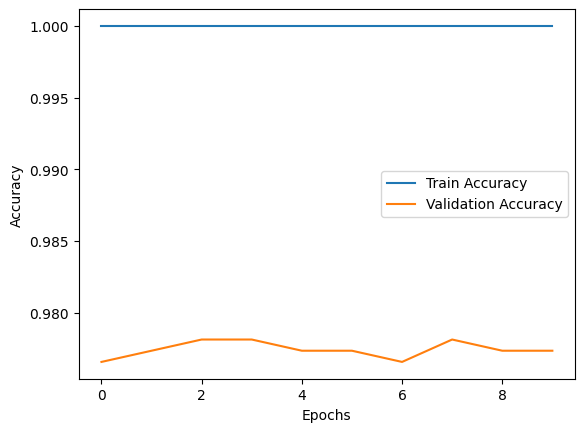

In [20]:
import matplotlib.pyplot as plt

# Traccia il grafico dell'accuratezza
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
